# KohKW

<cite data-cite="6202365/8AH9AXN2"></cite>


[![econ-ark.org](https://img.shields.io/badge/Powered%20by-Econ--ARK-3e8acc.svg)](https://econ-ark.org/materials/BufferStockTheory)


`# Setup Python Below`

In [2]:
# This cell does some setup

# Import required python packages
import warnings

# Ignore some harmless but alarming warning messages
warnings.filterwarnings("ignore")

# Plotting tools
import pandas as pd
import statsmodels.discrete.discrete_model as smdm
import statsmodels.api as sm
import numpy as np
from patsy import dmatrices
import os
import matplotlib.pyplot as plt
filepath = os.path.abspath(os.getcwd())
filepath

'C:\\Users\\user\\Documents\\GitHub\\econ-ark\\CompMethods2021-KohKW'

`# Setup Regressions Below`

In [3]:
OwnData = pd.read_csv("RegA2.csv")
OwnData = OwnData.dropna(subset = ['sw_p', 'mov_past'])
OwnData = OwnData[OwnData.reinc != 1]
OwnData

,chamber,issue,group,reinc,billgpreinc,bioguide_id,congress,vote_sp,sw_p,icpsr,...,log_contributions_FIRE,mov_contr_int,mov5_contr_int,mov10_contr_int,dem,rep,bioguide_id_num,group_cong,reinc_cong,icpsr_cong
7,House,S256,2,5,8,A000014,109,0,0.0,15245.0,...,11.383386,330.02625,0.0,0.0,1,0,15245.0,2 109,5 109,15245 109
9,House,HR2060,2,7,10,A000014,109,1,1.0,NaN,...,11.383386,330.02625,0.0,0.0,1,0,NaN,2 109,7 109,NaN
14,House,HR1276,3,5,15,A000014,108,1,0.0,NaN,...,11.198899,536.86035,0.0,0.0,1,0,NaN,3 108,5 108,NaN
16,House,HR3755,3,7,17,A000014,108,1,0.0,NaN,...,11.198899,536.86035,0.0,0.0,1,0,NaN,3 108,7 108,NaN
17,House,HR5121,3,8,18,A000014,109,1,0.0,15245.0,...,11.383386,330.02625,0.0,0.0,1,0,15245.0,3 109,8 109,15245 109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36912,House,HR5121,3,8,18,Y000033,109,1,0.0,14066.0,...,11.994036,584.28522,0.0,0.0,0,1,14066.0,3 109,8 109,14066 109
36919,House,HR1461,4,5,25,Y000033,109,1,1.0,14066.0,...,11.994036,584.28522,0.0,0.0,0,1,14066.0,4 109,5 109,14066 109
36939,House,HR1375,6,4,45,Y000033,108,1,1.0,14066.0,...,11.596347,663.66394,0.0,0.0,0,1,14066.0,6 108,4 108,14066 108
36940,House,HR3505,6,5,46,Y000033,109,1,0.0,14066.0,...,11.994036,584.28522,0.0,0.0,0,1,14066.0,6 109,5 109,14066 109


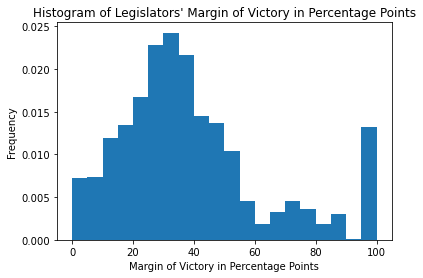

In [4]:
fig = plt.hist(OwnData.mov_past, bins=np.linspace(0,100,21), density=True)
plt.title('Histogram of Legislators\' Margin of Victory in Percentage Points')
plt.xlabel('Margin of Victory in Percentage Points')
plt.ylabel('Frequency')
plt.savefig("TestFig1",transparent=False)

In [5]:
os.replace(filepath + "/TestFig1.png", filepath + "/Figures/TestFig1.png")

In [6]:
y, X = dmatrices('sw_p ~ log_contributions_FIRE + bill_complexity + tight', data=OwnData, return_type='dataframe')
OLSmodel = sm.OLS(y,X)
results_0 = OLSmodel.fit()
results_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sw_p   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     36.02
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           8.69e-23
Time:                        19:25:33   Log-Likelihood:                -1571.9
No. Observations:                2517   AIC:                             3152.
Df Residuals:                    2513   BIC:                             3175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1605      0.112      1.433      0.152      -0.059       0.380
log_contributions_FIRE     0.0003      0.009      0.038      0.970      -0.018       0.019
bill_complexity            0.0366      0.007      4.914      0.000       0.022       0.051
tight                     -0.2957      0.037     -8.062      0.000      -0.368      -0.224
==============================================================================
Omnibus:                    15281.772   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.791
Skew:                           0.746   Prob(JB):                     1.90e-91
Kurtosis:                       1.675   Cond. No.                         157.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
OwnData['mov_contr_int'] = OwnData.apply(lambda row: row.mov_past * row.log_contributions_FIRE, axis = 1)

y, X = dmatrices('sw_p ~ log_contributions_FIRE + mov_past + mov_contr_int + bill_complexity + tight', data=OwnData, return_type='dataframe')
OLSmodel = sm.OLS(y,X)
results_1 = OLSmodel.fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sw_p   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     23.22
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           7.18e-23
Time:                        19:25:37   Log-Likelihood:                -1568.0
No. Observations:                2517   AIC:                             3148.
Df Residuals:                    2511   BIC:                             3183.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.2626      0.218     -1.203      0.229      -0.691       0.165
log_contributions_FIRE     0.0375      0.018      2.073      0.038       0.002       0.073
mov_past                   0.0112      0.004      2.502      0.012       0.002       0.020
mov_contr_int             -0.0010      0.000     -2.602      0.009      -0.002      -0.000
bill_complexity            0.0365      0.007      4.902      0.000       0.022       0.051
tight                     -0.2966      0.037     -8.090      0.000      -0.368      -0.225
==============================================================================
Omnibus:                    11595.112   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.538
Skew:                           0.743   Prob(JB):                     1.59e-90
Kurtosis:                       1.683   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
OwnData['congru_contr_int'] = OwnData.apply(lambda row: row.congruence_dc * row.log_contributions_FIRE, axis = 1)

y, X = dmatrices('sw_p ~ congruence_dc + bill_complexity + tight', data=OwnData, return_type='dataframe')
OLSmodel = sm.OLS(y,X)
results_2 = OLSmodel.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sw_p   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     33.53
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           4.13e-21
Time:                        19:25:48   Log-Likelihood:                -1256.1
No. Observations:                1899   AIC:                             2520.
Df Residuals:                    1895   BIC:                             2542.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2906      0.040      7.324      0.000       0.213       0.368
congruence_dc      -0.1156      0.048     -2.396      0.017      -0.210      -0.021
bill_complexity     0.0334      0.009      3.822      0.000       0.016       0.051
tight              -0.3824      0.044     -8.779      0.000      -0.468      -0.297
==============================================================================
Omnibus:                     8991.382   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.411
Skew:                           0.460   Prob(JB):                     1.43e-63
Kurtosis:                       1.323   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
with open('results_0.tex','w') as file:
	file.write(results_0.summary().as_latex())

with open('results_1.tex','w') as file:
	file.write(results_1.summary().as_latex())

with open('results_2.tex','w') as file:
	file.write(results_2.summary().as_latex())

In [10]:
os.replace(filepath + "/results_0.tex", filepath + "/Tables/results_0.tex")
os.replace(filepath + "/results_1.tex", filepath + "/Tables/results_1.tex")
os.replace(filepath + "/results_2.tex", filepath + "/Tables/results_2.tex")